# Презентация

Презентация: https://drive.google.com/file/d/1d5Zor3xASjfhD7HuFdGZTH9XfMi9qdRc/view?usp=sharing

# Задача: сформировать модель монетизации игрового приложения.

**Цель исследования:**
1. сформулировать модель монетизации игрового приложения.

**Ход исследования**

Исследование пройдёт по следующим этапам:
 1. Загрузка и первичный обзор данных.
 2. Предобработка данных - поиск пропущенных значений, изменение типов данных, поиск дубликатов, корректировка названий столбцов, добавление новых столбцов для исследования.
 3. Исследовательский анализ данных.
 4. Формирование модели окупаемости рекламы.
 5. Проверка гипотез.
 7. Выводы.
 8. Дэшборд.

**Оглавление**
<a id='section_id8'></a>
1. [Загрузка и первичный обзор данных](#section_id1)
2. [Предобработка данных](#section_id2)
3. [Исследовательский анализ данных](#section_id3)
4. [Модель окупаемости рекламы](#section_id4)
5. [Проверка гипотез](#section_id5)
6. [Выводы](#section_id6)
7. [Дэшборд](#section_id7)

In [1]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats

In [2]:
pd.options.display.float_format = '{:,.2f}'.format # установим удобный формат отображения чисел

<a id='section_id1'></a>
## Загрузка и первичный обзор данных

In [3]:
# загружаем датасеты
game_actions = pd.read_csv('datasets/game_actions.csv')
ad_costs = pd.read_csv('datasets/ad_costs.csv')
user_source = pd.read_csv('datasets/user_source.csv')

### game_actions

In [4]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [5]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


In [6]:
# посмотрим на уникальные значения в колонках. Интересуют event, building_type, project_type
for column in game_actions.columns:
    print(game_actions[column].unique())
    print()

['2020-05-04 00:00:01' '2020-05-04 00:00:03' '2020-05-04 00:00:16' ...
 '2020-06-05 08:57:52' '2020-06-05 12:12:27' '2020-06-05 12:32:49']

['building' 'finished_stage_1' 'project']

['assembly_shop' 'spaceport' nan 'research_center']

['55e92310-cb8e-4754-b622-597e124b03de'
 'c07b1c10-f477-44dc-81dc-ec82254b1347'
 '6edd42cc-e753-4ff6-a947-2107cd560710' ...
 '7b225969-375a-455e-a14a-ed1ab373fb65'
 'cafd1b8b-507b-49ae-abf0-89fe863a8b03'
 'bdc53e19-462a-4dc3-8b55-b4a34278af6a']

[nan 'satellite_orbital_assembly']



### ad_costs

In [7]:
ad_costs.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.88
1,facebook_ads,2020-05-04,548.35
2,facebook_ads,2020-05-05,260.19
3,facebook_ads,2020-05-06,177.98
4,facebook_ads,2020-05-07,111.77


In [8]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 804.0+ bytes


In [9]:
# посмотрим на уникальные значения в колонке source
ad_costs.source.unique()

array(['facebook_ads', 'instagram_new_adverts', 'yandex_direct',
       'youtube_channel_reklama'], dtype=object)

### user_source

In [10]:
user_source.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


In [11]:
user_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.3+ KB


In [12]:
# посмотрим на уникальные значения в колонке source
user_source.source.unique()

array(['facebook_ads', 'yandex_direct', 'youtube_channel_reklama',
       'instagram_new_adverts'], dtype=object)

**Выводы:**
1. Проверим на наличие явных дубликатов во всех 3 таблицах.
2. В таблице game_actions приведем формат колонки event_datetime к дате.
3. В таблице game_actions исследуем пропуски на хорошие и плохие. Хорошими будем считать пропуски в колонке building_type, если им соответствует finished_stage_1 или project в колонке event. Плохими если пропуску в колонке building_type соответствует building по колонке event. Также проверим, что  значению satellity_ordbital_assembly в колонке project_type соответствует event project.
4. В таблице ad_costs приведем формат колонки day к дате.

[Оглавление](#section_id8)

<a id='section_id2'></a>
## Предобработка данных

### game_actions

In [13]:
# проверим на наличие явных дубликатов
game_actions.duplicated().sum()

1

In [14]:
# удалим дубликат и убедимся, что их не осталось
game_actions = game_actions.drop_duplicates()
game_actions.duplicated().sum()

0

In [15]:
ad_costs.duplicated().sum()

0

In [16]:
# переводим формат в datetime
game_actions.event_datetime = pd.to_datetime(game_actions.event_datetime)

In [17]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135639 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   127956 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 6.2+ MB


In [18]:
# проверяем, что пропускам в колонке project_type соответствуют только значения building и finished_stage_1 в колонке event
game_actions.query('project_type.isna()').event.unique()

array(['building', 'finished_stage_1'], dtype=object)

In [19]:
# проверяем, что значению satellity_ordbital_assembly в колонке project_type соответствует event project
game_actions.query('project_type == "satellite_orbital_assembly"').event.unique()

array(['project'], dtype=object)

### ad_costs

In [20]:
# переводим формат в datetime
ad_costs.day = pd.to_datetime(ad_costs.day)

In [21]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   day     28 non-null     datetime64[ns]
 2   cost    28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 804.0+ bytes


**Выводы:**
1. Приведены форматы данных в колонках с датой и временем.
2. Удален один дубликат в таблице game_actions.
3. Проверены пропуски в таблице game_actions - плохих не обнаружено.

[Оглавление](#section_id8)

<a id='section_id3'></a>
## Исследовательский анализ данных

### Количество действий, совершаемых игроком для прохождения уровня.

In [22]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135639 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   127956 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 6.2+ MB


In [23]:
# получим список игроков, которые прошли первый уровень и посчитаем количество таких игроков
users_finished = game_actions.query('event == "finished_stage_1"').user_id.unique()
pd.Series(users_finished).count()

5817

In [24]:
# напишем функцию для разбивки пользователей на закончивших 1 уровень и не закончивших его
def finished(user_id):
    if user_id in users_finished:
        return True
    else:
        return False

game_actions['finished_stage_1'] = game_actions['user_id'].apply(finished)

In [25]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,finished_stage_1
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,False
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,True
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,True
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,False
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,True


In [26]:
# проверяем, что количество пользователей, которые прошли первый уровень соответствует расчету выше
game_actions[game_actions.finished_stage_1 == True].user_id.nunique() == pd.Series(users_finished).count()

True

In [27]:
# проверяем, что общее число уникальных пользователей сходится
(game_actions[game_actions.finished_stage_1 == False].user_id.nunique()\
+ game_actions[game_actions.finished_stage_1 == True].user_id.nunique())\
== user_source.user_id.nunique()

True

In [28]:
avg_events = game_actions.query('finished_stage_1 == True & event == "building"').event.count() / pd.Series(users_finished).count()

In [29]:
# посчитаем сколько действий строительства совершил каждый игрок до завершения уровня
game_actions_by_users = game_actions.query('event == "building"') \
                                    .groupby(['user_id', 'finished_stage_1'], as_index=False)\
                                    .agg({'event_datetime':'count'})
game_actions_by_users = game_actions_by_users.rename(columns={'event_datetime':'events'})
game_actions_by_users

,user_id,finished_stage_1,events
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,False,13
1,00151b4f-ba38-44a8-a650-d7cf130a0105,False,9
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,False,4
3,001d39dc-366c-4021-9604-6a3b9ff01e25,True,8
4,002f508f-67b6-479f-814b-b05f00d4e995,False,12
...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,True,9
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,False,16
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,True,9
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,False,7


In [30]:
# посмотрим информацию о количестве событий, сделанных игроками, прошедшими первый уровень
game_actions_by_users.query('finished_stage_1 == True').events.describe()

count   5,817.00
mean       10.45
std         3.18
min         2.00
25%         9.00
50%        11.00
75%        12.00
max        20.00
Name: events, dtype: float64

In [31]:
# посмотрим информацию о количестве событий, сделанных игроками, не прошедшими первый уровень
game_actions_by_users.query('finished_stage_1 == False').events.describe()

count   7,759.00
mean        8.66
std         4.14
min         1.00
25%         5.00
50%         8.00
75%        12.00
max        20.00
Name: events, dtype: float64

In [32]:
print('Среднее число построек для прохождения первого уровня:', '{:.2f}'.format(avg_events))

Среднее число построек для прохождения первого уровня: 10.45


In [33]:
avg_events_failed = game_actions.query('finished_stage_1 == False & event == "building"').event.count() / game_actions.query('finished_stage_1 == False').user_id.nunique()

In [34]:
print('Среднее число построек у игроков, которые не прошли первый уровень:', '{:.2f}'.format(avg_events_failed))

Среднее число построек у игроков, которые не прошли первый уровень: 8.66


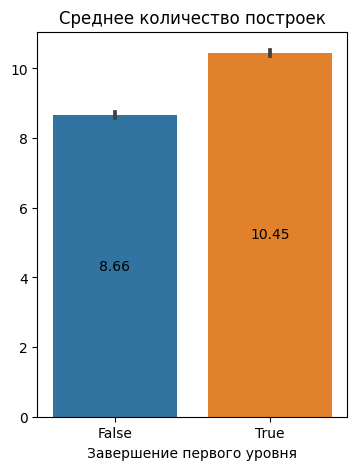

In [35]:
plt.figure(figsize=(4,5))
ax = sns.barplot(data=game_actions_by_users, x='finished_stage_1', y='events');
plt.title('Среднее количество построек')
plt.xlabel('Завершение первого уровня')
plt.ylabel('')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height() / 2.), 
                ha = 'center', va = 'center', 
                xytext = (0, 0), 
                textcoords = 'offset points')


**Выводы:**
игроки, которые прошли первый уровень, в среднем совершают на 2 постройки больше, чем те, которые его не прошли.

### Процент игроков, которые проходят первый уровень

In [36]:
print('Процент игроков, которые проходят первый уровень:', '{:.2f}'.format((pd.Series(users_finished).count() / game_actions.user_id.nunique())*100))

Процент игроков, которые проходят первый уровень: 42.85


**Выводы:** первый уровень прошли почти 43% игроков.

### Определить на какой день отсеивается больше всего игроков

In [37]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,finished_stage_1
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,False
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,True
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,True
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,False
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,True


In [38]:
# добавим колонку с датой для подсчета дней в игре каждого игрока
game_actions['date'] = pd.to_datetime(game_actions['event_datetime'], format='%Y-%m-%d').dt.floor('D')

In [39]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,finished_stage_1,date
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,False,2020-05-04
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,True,2020-05-04
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,True,2020-05-04
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,False,2020-05-04
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,True,2020-05-04


In [40]:
# сделаем сводную таблицу по игрокам для расчета количества календарных дней в игре
game_duration = game_actions.query('finished_stage_1 == False') \
                              .pivot_table(index='user_id', values='event_datetime', aggfunc=['min', 'max'])\
                              .reset_index()
# переименуем колонки
game_duration.columns = ['user_id', 'min', 'max']
# проверим наименования колонок
game_duration.columns

Index(['user_id', 'min', 'max'], dtype='object')

In [41]:
game_duration['game_time'] = (game_duration['max'] - game_duration['min']).dt.days

In [42]:
game_duration.game_time.describe()

count   7,759.00
mean        9.29
std         4.35
min         0.00
25%         6.00
50%         9.00
75%        12.00
max        29.00
Name: game_time, dtype: float64

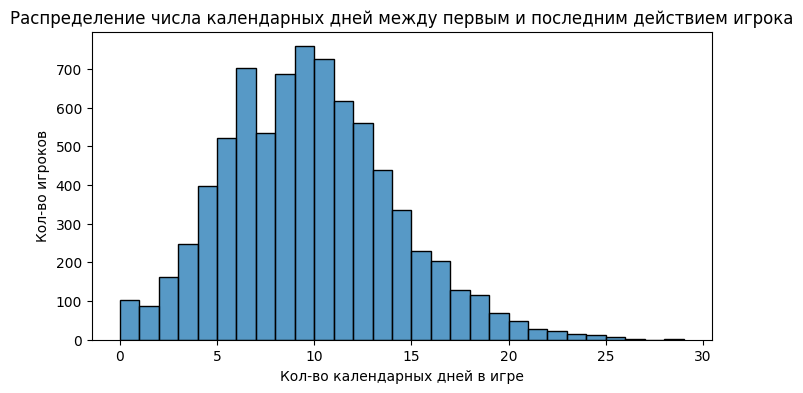

In [43]:
plt.figure(figsize=(8, 4))
sns.histplot(data=game_duration, x='game_time', bins = 29)
plt.ylabel('Кол-во игроков')
plt.xlabel('Кол-во календарных дней в игре')
plt.title('Распределение числа календарных дней между первым и последним действием игрока');

In [44]:
# сделаем сводную таблицу по игрокам для расчета количества дней в игре (когда совершалось игровое действие)
game_duration_fact = game_actions.query('finished_stage_1 == False') \
                              .pivot_table(index='user_id', values='date', aggfunc='nunique')\
                              .reset_index()
# переименуем колонки
game_duration_fact.columns = ['user_id', 'days_played']
# проверим наименования колонок
game_duration_fact.columns

Index(['user_id', 'days_played'], dtype='object')

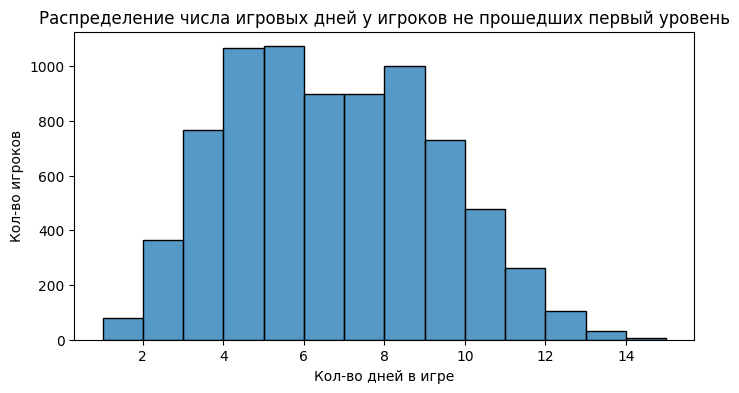

In [45]:
plt.figure(figsize=(8, 4))
sns.histplot(data=game_duration_fact, x='days_played', bins = 14)
plt.ylabel('Кол-во игроков')
plt.xlabel('Кол-во дней в игре')
plt.title('Распределение числа игровых дней у игроков не прошедших первый уровень');

In [46]:
game_duration_fact.days_played.describe()

count   7,759.00
mean        6.24
std         2.57
min         1.00
25%         4.00
50%         6.00
75%         8.00
max        15.00
Name: days_played, dtype: float64

**Выводы:**
1. 75% процентов игроков, которые не прошли первый уровень, не делали построек после 8 игрового дня.
2. 75% процентов игроков, которые не прошли первый уровень, не делали построек после 12 календарного дня.

### Затраты на рекламу

In [47]:
# рассчитаем стоимость привлечения одного игрока
cac = ad_costs.cost.sum() / game_actions.user_id.nunique()
print('Средняя стоимость привлечения одного игрока:', '{:.2f}'.format(cac))

Средняя стоимость привлечения одного игрока: 0.56


In [48]:
# зададим переменную со стоимостью показа одной рекламы
rev_per_ad = 0.07

In [49]:
# рассчитаем кол-во показов рекламы для окупаемости привлечения игроков
print('Количество показов рекламы одному игроку для окупаемости привлечения игроков:', '{:.2f}'.format(cac / rev_per_ad))

Количество показов рекламы одному игроку для окупаемости привлечения игроков: 8.00


In [57]:
# агрегируем затраты на рекламу по площадкам
ad_costs_by_source = ad_costs.groupby('source', as_index=False).agg({'day':'count', 'cost':'sum'})
ad_costs_by_source

,source,day,cost
0,facebook_ads,7,"2,140.90"
1,instagram_new_adverts,7,"2,161.44"
2,yandex_direct,7,"2,233.11"
3,youtube_channel_reklama,7,"1,068.12"


In [58]:
# посчитаем количество привелченных пользователей по площадкам
users_by_source = user_source.groupby('source', as_index=False).agg('count').rename(columns={'user_id':'users'})
users_by_source

,source,users
0,facebook_ads,2726
1,instagram_new_adverts,3347
2,yandex_direct,4817
3,youtube_channel_reklama,2686


In [59]:
# соединяем две таблицы в одну
ad_costs_by_source_with_users = ad_costs_by_source.merge(users_by_source, how='left', on='source')
ad_costs_by_source_with_users

,source,day,cost,users
0,facebook_ads,7,"2,140.90",2726
1,instagram_new_adverts,7,"2,161.44",3347
2,yandex_direct,7,"2,233.11",4817
3,youtube_channel_reklama,7,"1,068.12",2686


In [60]:
# считаем среднюю стоимость привлечения пользователя
ad_costs_by_source_with_users['cost_per_user'] = ad_costs_by_source_with_users['cost'] / ad_costs_by_source_with_users['users']
ad_costs_by_source_with_users['avg_cost_per_user'] = cac
ad_costs_by_source_with_users.sort_values(by='cost_per_user')

,source,day,cost,users,cost_per_user,avg_cost_per_user
3,youtube_channel_reklama,7,"1,068.12",2686,0.40,0.56
2,yandex_direct,7,"2,233.11",4817,0.46,0.56
1,instagram_new_adverts,7,"2,161.44",3347,0.65,0.56
0,facebook_ads,7,"2,140.90",2726,0.79,0.56


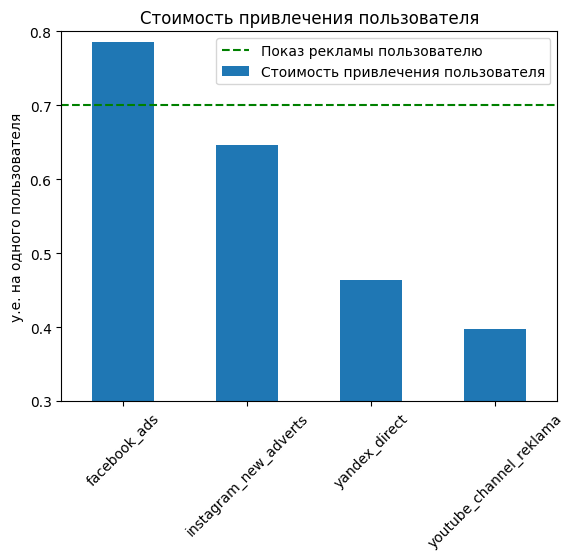

In [61]:
ad_costs_by_source_with_users.plot(kind='bar',
                                   x='source',
                                   y='cost_per_user',
                                   title='Стоимость привлечения пользователя',
                                   legend=True,
                                   rot=45,
                                   ylim=[0.3, 0.8])
plt.xlabel('')
plt.ylabel('у.е. на одного пользователя')
plt.axhline(y=0.7, color='g', linestyle='--')
plt.legend(labels = ['Показ рекламы пользователю', 'Стоимость привлечения пользователя']);

In [62]:
game_actions = game_actions.merge(user_source, how='left', on='user_id')
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,finished_stage_1,date,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,False,2020-05-04,youtube_channel_reklama
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,True,2020-05-04,facebook_ads
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,True,2020-05-04,instagram_new_adverts
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,False,2020-05-04,facebook_ads
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,True,2020-05-04,yandex_direct


In [63]:
# проверим отличается ли среднее количество построек между игроками, пришедшими из разных источников
events_by_source = game_actions.pivot_table(index=['source', 'finished_stage_1'],\
                                            values=['event_datetime','user_id'],\
                                            aggfunc={'event_datetime':'count','user_id':'nunique'})\
                                .reset_index()\
                                .rename(columns={'event_datetime':'events', 'user_id':'users'}) 
events_by_source['events_per_user'] = events_by_source['events'] / events_by_source['users']
events_by_source.sort_values('finished_stage_1', ascending=False)

,source,finished_stage_1,events,users,events_per_user
1,facebook_ads,True,13644,1150,11.86
3,instagram_new_adverts,True,17320,1466,11.81
5,yandex_direct,True,23803,2042,11.66
7,youtube_channel_reklama,True,13702,1159,11.82
0,facebook_ads,False,14028,1576,8.90
2,instagram_new_adverts,False,16437,1881,8.74
4,yandex_direct,False,23891,2775,8.61
6,youtube_channel_reklama,False,12814,1527,8.39


(array([0, 1, 2, 3]),
 [Text(0, 0, 'facebook_ads'),
  Text(1, 0, 'instagram_new_adverts'),
  Text(2, 0, 'yandex_direct'),
  Text(3, 0, 'youtube_channel_reklama')])

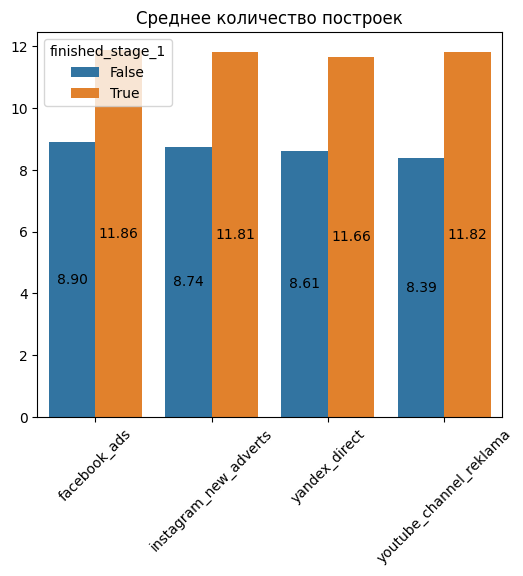

In [64]:
plt.figure(figsize=(6,5))
ax = sns.barplot(data=events_by_source, x='source', y='events_per_user', hue='finished_stage_1');
plt.title('Среднее количество построек')
plt.xlabel('')
plt.ylabel('')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height() / 2.), 
                ha = 'center', va = 'center', 
                xytext = (0, 0), 
                textcoords = 'offset points')
plt.xticks(rotation=45)

In [65]:
# посчитаем процент прохождения первого уровня игроков по источникам
events_by_source = events_by_source.query('finished_stage_1 == True').merge(ad_costs_by_source_with_users, how='left', on = 'source')

In [66]:
events_by_source

,source,finished_stage_1,events,users_x,events_per_user,day,cost,users_y,cost_per_user,avg_cost_per_user
0,facebook_ads,True,13644,1150,11.86,7,"2,140.90",2726,0.79,0.56
1,instagram_new_adverts,True,17320,1466,11.81,7,"2,161.44",3347,0.65,0.56
2,yandex_direct,True,23803,2042,11.66,7,"2,233.11",4817,0.46,0.56
3,youtube_channel_reklama,True,13702,1159,11.82,7,"1,068.12",2686,0.40,0.56


In [67]:
events_by_source['fininshed_share'] = events_by_source['users_x'] / events_by_source['users_y']
events_by_source

,source,finished_stage_1,events,users_x,events_per_user,day,cost,users_y,cost_per_user,avg_cost_per_user,fininshed_share
0,facebook_ads,True,13644,1150,11.86,7,"2,140.90",2726,0.79,0.56,0.42
1,instagram_new_adverts,True,17320,1466,11.81,7,"2,161.44",3347,0.65,0.56,0.44
2,yandex_direct,True,23803,2042,11.66,7,"2,233.11",4817,0.46,0.56,0.42
3,youtube_channel_reklama,True,13702,1159,11.82,7,"1,068.12",2686,0.40,0.56,0.43


**Выводы:**
1. Самая дорогая реклама в facebook_ads (0.79) - в два раза больше, чем на youtube (0.4)
2. Источник привлечения игроков не влияет на количество построек.
3. Процент завершения первого уровня по источникам привлечения игроков примерно одинаковый.
4. Для окупаемости рекламы каждому игроку необходимо показать ее не менее 8 раз.

[Оглавление](#section_id8)

<a id='section_id4'></a>
## Модель окупаемости рекламы

In [68]:
# ранее мы выяснили следующее:
print('Количество показов рекламы одному игроку для окупаемости привлечения игроков:', '{:.2f}'.format(cac / rev_per_ad))

Количество показов рекламы одному игроку для окупаемости привлечения игроков: 8.00


In [69]:
# посмотрим медианное и среднее значение числа построек игроками
game_actions_by_users.events.describe()

count   13,576.00
mean         9.43
std          3.86
min          1.00
25%          6.00
50%         10.00
75%         12.00
max         20.00
Name: events, dtype: float64

Таким образом получается, чтобы окупить рекламу, показывать нужно со второй постройки всем без исключения пользователям.

In [70]:
# посчитаем roi по разным сценариям:
# 1. показ с первой постройки
ltv_first_building = ((game_actions_by_users.events.sum() * rev_per_ad) / ad_costs.cost.sum() - 1)
print('ROI при показе рекламы с первой постройки:', '{:.2%}'.format(ltv_first_building))
# 2. показ со второй постройки
ltv_second_building = (((game_actions_by_users.events.sum() - game_actions_by_users.user_id.nunique()) * rev_per_ad) / ad_costs.cost.sum() - 1)
print('ROI при показе рекламы со второй постройки:', '{:.2%}'.format(ltv_second_building))
# 3. показ с третьей постройки
ltv_third_building = (((game_actions_by_users.events.sum()\
                        - game_actions_by_users.user_id.nunique() * 2\
                        + game_actions_by_users.query('events == 1').user_id.nunique())\
                        * rev_per_ad) / ad_costs.cost.sum() - 1)
print('ROI при показе рекламы с третьей постройки:', '{:.2%}'.format(ltv_third_building))

ROI при показе рекламы с первой постройки: 17.80%
ROI при показе рекламы со второй постройки: 5.30%
ROI при показе рекламы с третьей постройки: -7.15%


**Выводы:**
1. ROI при показе рекламы с первой постройки: 17.80%
2. ROI при показе рекламы со второй постройки: 5.30%
3. ROI при показе рекламы с третьей постройки: -7.15%

[Оглавление](#section_id8)

<a id='section_id5'></a>
## Проверка гипотез

### Проверить гипотезу различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.

Формулируем гипотезы:
1. H0: различия во времени прохождения первого уровня между группам нет
2. H1: есть различия во времени прохождения первого уровня между группами

In [71]:
# сделаем сводную таблицу по игрокам для расчета количества дней в игре (когда совершалось игровое действие)
game_duration_all = game_actions \
                              .pivot_table(index=['user_id','finished_stage_1',], values='date', aggfunc='nunique')\
                              .reset_index()
# переименуем колонки
game_duration_all.columns = ['user_id', 'finished_stage_1', 'days_played']
# проверим наименования колонок
game_duration_all.columns

Index(['user_id', 'finished_stage_1', 'days_played'], dtype='object')

In [72]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,finished_stage_1,date,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,False,2020-05-04,youtube_channel_reklama
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,True,2020-05-04,facebook_ads
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,True,2020-05-04,instagram_new_adverts
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,False,2020-05-04,facebook_ads
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,True,2020-05-04,yandex_direct


In [73]:
# определим тех, кто закончил уровень через проект
project_users = game_actions.query('event == "project"').user_id.unique()
project_users

array(['e3c66498-9d45-4000-9392-f81e6796e7da',
       '936e7af6-8338-4703-a1df-fc6c3f5b8e34',
       'a4491c86-c498-4f74-a56e-65c136d0e9a1', ...,
       '82e46f34-e243-4728-8e20-2e171fc33ea4',
       'fe032991-71e0-48c5-889f-4c3805ba4c9b',
       'd477dde8-7c22-4f23-9c4f-4ec31a1aa4c8'], dtype=object)

In [74]:
# напишем функцию для разбивки пользователей на закончивших через проект и через победу над другим игроком
def project(user_id):
    if user_id in project_users:
        return True
    else:
        return False

game_actions['finished_via_project'] = game_actions['user_id'].apply(project)

In [75]:
# посчитаем количество дней, необходимых для прохождения первого уровня по пользователям и группам finished_via_project
first_level_comp = game_actions.query('finished_stage_1 == True')\
                .pivot_table(index=['finished_via_project', 'user_id'], values=['date','event'],\
                            aggfunc={'date':'nunique', 'event':'count'})\
                .reset_index()
# переименуем колонки
first_level_comp.columns = ['finished_via_project', 'user_id', 'days_played', 'events']
# проверим наименования колонок
first_level_comp.columns

Index(['finished_via_project', 'user_id', 'days_played', 'events'], dtype='object')

In [76]:
first_level_comp

,finished_via_project,user_id,days_played,events
0,False,001d39dc-366c-4021-9604-6a3b9ff01e25,6,9
1,False,003ee7e8-6356-4286-a715-62f22a18d2a1,6,9
2,False,004074f8-251a-4776-922c-8348dca1a2f6,8,13
3,False,00464e5e-28ed-4be6-bf44-517ef7b3937b,6,9
4,False,0056c007-c082-43cc-bdef-afc49bca4cb9,4,4
...,...,...,...,...
5812,True,ff50f63a-c4b3-494e-8bf9-3f19dbfc513e,16,20
5813,True,ff60fcd1-4329-494e-b82d-461fbdf5b5eb,7,13
5814,True,ff83bdd8-f49a-49fd-8aad-9fa1fb30d516,8,15
5815,True,ff841992-d93b-462e-bc6e-18c24a514f36,12,22


In [77]:
print('p-value:','{0:.2f}'.format(stats.mannwhitneyu(first_level_comp[first_level_comp['finished_via_project']==False]['days_played'],
                                          first_level_comp[first_level_comp['finished_via_project']==True]['days_played'])[1]))
print('Относительное различие среднего количества дней прохождения уровня между группами:','{0:.2%}'.format(first_level_comp[first_level_comp['finished_via_project']==True]['days_played']\
               .mean()/first_level_comp[first_level_comp['finished_via_project']==False]['days_played']\
               .mean() -1))

p-value: 0.00
Относительное различие среднего количества дней прохождения уровня между группами: 32.16%


**Вывод:** есть статистически значимое различие между группами игроков PvP и PvE во времени прохождения уровня.

### Проверить гипотезу различия количества событий для прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.

Формулируем гипотезы:
1. H0: различий в количестве событий при прохождении первого уровня между группам нет
2. H1: есть различия в количестве событий для прохождения первого уровня между группами

In [78]:
print('p-value:','{0:.2f}'.format(stats.mannwhitneyu(first_level_comp[first_level_comp['finished_via_project']==False]['events'],
                                          first_level_comp[first_level_comp['finished_via_project']==True]['events'])[1]))
print('Относительное различие среднего количества событий при прохождении уровня между группами:','{0:.2%}'.format(first_level_comp[first_level_comp['finished_via_project']==True]['events']\
               .mean()/first_level_comp[first_level_comp['finished_via_project']==False]['events']\
               .mean() -1))

p-value: 0.00
Относительное различие среднего количества событий при прохождении уровня между группами: 40.69%


**Вывод:** есть статистически значимое различие между группами игроков PvP и PvE во времени прохождения уровня.

[Оглавление](#section_id8)

<a id='section_id6'></a>
## Выводы

1. Для окупаемости рекламы необходимо в среднем 8 показов каждому пользователю.
2. ROI 5% при показе рекламы начиная со второго экрана стройки и 18% при показе начиная с первого экрана.
3. При показе рекламы начиная с третьего экрана стройки ROI -7%.
4. Для разработки более глубокой модели можно рассмотреть возможность размещения рекламы не только на экранах строительства, но и перед битвами с врагом, так как PvP игроки статистически быстрее и с меньшим количеством строек проходят первый уровень.
5. Также имеет смысл обратить внимание на источники рекламы, так самый дешевый youtube почти в два раза дешевле самого дорого facebook. При этом среднее количество экранов строительства у игроков по этим источникам почти не отличается.

<a id='section_id7'></a>
## Дэшборд

Dashboard: https://public.tableau.com/views/GamesDashboard_16819982490650/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

[Оглавление](#section_id8)